In [136]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ETL

In [5]:
# Reading yield data from local file
df=pd.read_excel('/Users/ruhidmirzayev/Palette/Data/Cohort5/Manitoba_yield_02_22.xlsx')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61044 entries, 0 to 61043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  61044 non-null  int64 
 1   Risk Area / R.M.      61044 non-null  object
 2   Crop                  61044 non-null  object
 3   Soil                  61044 non-null  object
 4   Farms                 61044 non-null  object
 5   Acres                 61044 non-null  object
 6   Yield/acre(Metric)    61044 non-null  object
 7   Yield/acre(Metric).1  24887 non-null  object
 8   Yield/acre(Imperial)  24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.2+ MB


In [7]:
# Reading shapefile from local file
gdf=gpd.read_file('/Users/ruhidmirzayev/Palette/Data/Cohort5/MUNICIPALITY/MG_MUNICIPALITY_POLY.shp')

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    183 non-null    int64   
 1   MUNI_NO     183 non-null    int64   
 2   MUNI_NAME   183 non-null    object  
 3   MUNI_TYPE   183 non-null    object  
 4   MUNI_LIST_  183 non-null    object  
 5   MUNI_LIS_1  183 non-null    object  
 6   SHAPE_Leng  183 non-null    float64 
 7   SHAPE_Area  183 non-null    float64 
 8   geometry    183 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 13.0+ KB


## Data Standardizing

In [19]:
# Changing columns names
df_clean_1=df.rename(columns={'Risk Area / R.M.': 'RM', 'Yield/acre(Imperial)': 'Yield'})\
    .drop(columns=['Yield/acre(Metric)', 'Yield/acre(Metric).1'])

In [29]:
# Sorting Values
df_clean_2=df_clean_1.sort_values(['RM', 'Year', 'Crop'])

In [41]:
# Splitting Yield column to two - numeric and unit columns and 
df_clean_3=pd.concat([
    df_clean_2,
    df_clean_2['Yield'].str.split(' ', expand=True).rename(columns={0:'Yield_Float', 1:'Unit'})], axis=1)

In [49]:
df_clean_3

,Year,RM,Crop,Soil,Farms,Acres,Yield,Yield_Float,Unit
21394,2000,ALEXANDER,ARGENTINE CANOLA,F,12,"2,401.0",24.1 Bushels,24.1,Bushels
21661,2000,ALEXANDER,ARGENTINE CANOLA,E,10,"1,509.0",23.3 Bushels,23.3,Bushels
22851,2000,ALEXANDER,ARGENTINE CANOLA,G,10,930,19.0 Bushels,19.0,Bushels
23794,2000,ALEXANDER,ARGENTINE CANOLA,H,5,"1,464.0",13.5 Bushels,13.5,Bushels
24887,2000,ALEXANDER,ARGENTINE CANOLA,D,Below,Minimum,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
61041,2022,YELLOWHEAD,FLAX,B,Below,Minimum,NaN,NaN,NaN
61042,2022,YELLOWHEAD,FLAX,C,Below,Minimum,NaN,NaN,NaN
587,2022,YELLOWHEAD,OATS,C,10,"2,976.0",130.0 Bushels,130.0,Bushels
629,2022,YELLOWHEAD,OATS,B,10,"1,889.0",128.3 Bushels,128.3,Bushels


In [75]:
# Removing commas
df_clean_3['Yield_Float'].replace(to_replace={',': ''}, inplace=True)

In [71]:
df_clean_3['Unit'].unique()

array(['Bushels', nan, 'Pounds', 'Tons'], dtype=object)

In [72]:
df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61044 entries, 21394 to 61043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         61044 non-null  int64 
 1   RM           61044 non-null  object
 2   Crop         61044 non-null  object
 3   Soil         61044 non-null  object
 4   Farms        61044 non-null  object
 5   Acres        61044 non-null  object
 6   Yield        24887 non-null  object
 7   Yield_Float  24887 non-null  object
 8   Unit         24887 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.7+ MB


In [78]:
# Replace commas and convert to float
df_clean_3['Yield_Float'] = df_clean_3['Yield_Float'].str.replace(',', '').astype(float)

In [117]:
#Pivoting the table, make sure you check the ag function. 
df_clean_4=df_clean_3.pivot_table(index=['Year', 'RM', 'Soil', 'Farms','Acres', 'Unit'], columns='Crop',values='Yield_Float' )\
                .reset_index()

In [119]:
# Standardizing column names 

df_clean_4.columns=df_clean_4.columns.str.capitalize()

In [ ]:
# Fababeans / 60, Lentils/60), Canaryseed /50 - Pounds to Bushels

In [123]:
# Convertng pounds to bushels
# Fababeans / 60, Lentils/60), Canaryseed /50 - Pounds to Bushels
df_clean_4['Fababeans']= df_clean_4['Fababeans'] / 60
df_clean_4['Lentils'] = df_clean_4['Lentils'] / 60
df_clean_4['Canaryseed']=df_clean_4['Canaryseed'] / 50

In [126]:
df_clean_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop,,,,,,,,
Year,24887.0,2010.183710,6.734999,2000.000000,2004.000000,2009.000000,2016.000000,2022.000000
Farms,24887.0,17.013059,17.214860,3.000000,6.000000,11.000000,21.000000,154.000000
Alfalfa,415.0,2.111202,0.915581,0.257000,1.436500,2.053000,2.767000,6.505000
Argentine canola,9543.0,34.530714,9.994812,0.300000,28.000000,35.100000,42.000000,85.100000
Barley,4891.0,64.857677,19.214300,3.900000,52.800000,65.800000,78.500000,116.900000
Canaryseed,182.0,19.316703,10.458551,0.880000,10.770000,18.960000,26.780000,51.340000
Durum wheat,70.0,36.648571,7.872181,18.000000,31.700000,37.450000,40.875000,54.100000
Fababeans,25.0,37.903333,11.470229,11.766667,32.083333,37.716667,44.466667,61.033333
Field peas,916.0,43.427948,13.885639,3.000000,35.075000,42.850000,52.600000,80.000000


In [127]:
df_clean_4

Crop,Year,Rm,Soil,Farms,Acres,Unit,Alfalfa,Argentine canola,Barley,Canaryseed,Durum wheat,Fababeans,Field peas,Flax,Lentils,Oats,Winter wheat
0,2000,ALEXANDER,E,6,843,Bushels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.6,NaN
1,2000,ALEXANDER,E,10,"1,509.0",Bushels,NaN,23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ALEXANDER,F,8,833,Bushels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.2,NaN
3,2000,ALEXANDER,F,12,"2,401.0",Bushels,NaN,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ALEXANDER,G,10,930,Bushels,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24882,2022,YELLOWHEAD,B,7,"2,336.0",Bushels,NaN,NaN,NaN,NaN,NaN,NaN,64.3,NaN,NaN,NaN,NaN
24883,2022,YELLOWHEAD,B,17,"4,910.0",Bushels,NaN,NaN,81.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24884,2022,YELLOWHEAD,B,49,"28,214.0",Bushels,NaN,44.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24885,2022,REYNOLDS,F,5,629,Bushels,NaN,44.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
ds=df_clean_4.copy()

# EDA ( Exploratory Data Analysis)

## Missing Values

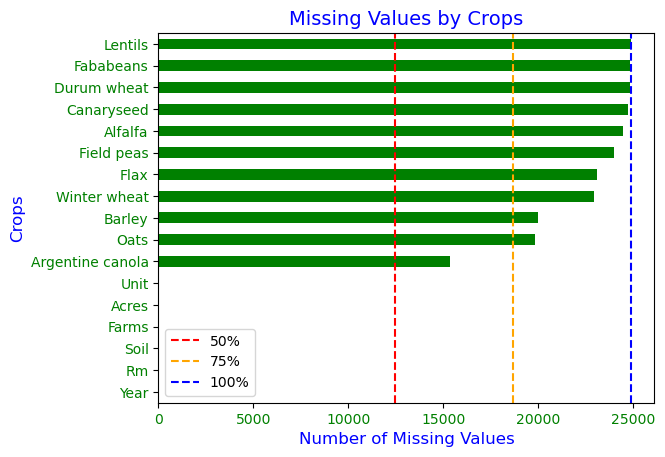

In [168]:
# Checking for missing values

ds.isna().sum()\
    .sort_values()\
    .plot(kind='barh', color='green')
plt.title('Missing Values by Crops', color= 'blue', size = 14)
plt.xlabel('Number of Missing Values', color= 'blue', size = 12)
plt.ylabel ('Crops', color= 'blue', size = 12)
plt.xticks(color='green')
plt.yticks(color='green')
plt.axvline(len(ds)/2, color='red', linestyle='--', label='50%') # half of dataset
plt.axvline(len(ds) * 0.75 , color='orange', linestyle='--', label='75%') # 75% of dataset
plt.axvline(len(ds) , color='blue', linestyle='--', label='100%') # 100% of dataset
plt.legend()
plt.show()

**Missing Values Handling**

- Fill with 0, mean or median - Lazy data scientist
- Drop them - Super Lazy
- Use ML to fill them - Smart
- Use groupby and fill averges - Bit smarter
- Geographic Locations - Neighboring Farms and Rural Municipalities

## Basic descriptive statistics

In [186]:
ds.describe().drop(columns=['Year', 'Farms'])

Crop,Alfalfa,Argentine canola,Barley,Canaryseed,Durum wheat,Fababeans,Field peas,Flax,Lentils,Oats,Winter wheat
count,415.000000,9543.000000,4891.000000,182.000000,70.000000,25.000000,916.000000,1813.000000,10.000000,5059.000000,1963.000000
mean,2.111202,34.530714,64.857677,19.316703,36.648571,37.903333,43.427948,20.966078,19.933333,91.691817,63.232145
std,0.915581,9.994812,19.214300,10.458551,7.872181,11.470229,13.885639,6.812380,9.735686,28.909526,13.624436
min,0.257000,0.300000,3.900000,0.880000,18.000000,11.766667,3.000000,0.000000,5.450000,6.900000,6.500000
25%,1.436500,28.000000,52.800000,10.770000,31.700000,32.083333,35.075000,16.800000,14.175000,71.100000,54.700000
50%,2.053000,35.100000,65.800000,18.960000,37.450000,37.716667,42.850000,21.000000,16.625000,91.700000,64.300000
75%,2.767000,42.000000,78.500000,26.780000,40.875000,44.466667,52.600000,25.200000,23.904167,112.000000,73.000000
max,6.505000,85.100000,116.900000,51.340000,54.100000,61.033333,80.000000,46.400000,36.850000,185.900000,96.000000


<Axes: xlabel='Crop'>

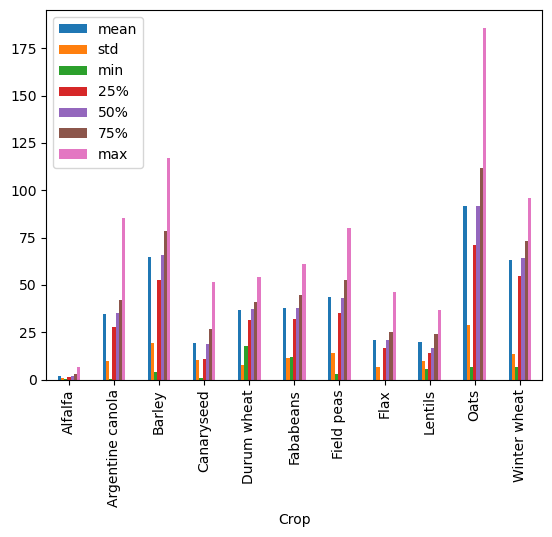

In [196]:
ds.describe().drop(columns=['Year', 'Farms']).drop('count', axis=0).T\
    .plot(kind='bar')

In [198]:
ds_des=ds.describe().drop(columns=['Year', 'Farms']).drop('count', axis=0).T

<Axes: xlabel='Crop'>

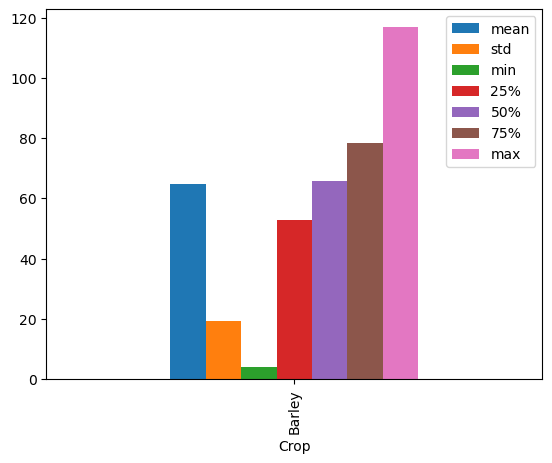

In [202]:
ds_des.loc[ds_des.index=='Barley']\
    .plot(kind='bar')